In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import sys

## 데이터 준비

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


In [17]:
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트 이미지 수: %d개" % (X_train.shape[0]))


학습셋 이미지 수: 60000개
테스트 이미지 수: 60000개


# 데이터 찍어보기

In [18]:
X_train.shape 
# 행 / 열 /깊이 axis=0, axis=1, axis= 2 axis= 축이라는 의미

(60000, 28, 28)

In [22]:
X_train[1] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
y_train[1]

np.uint8(0)

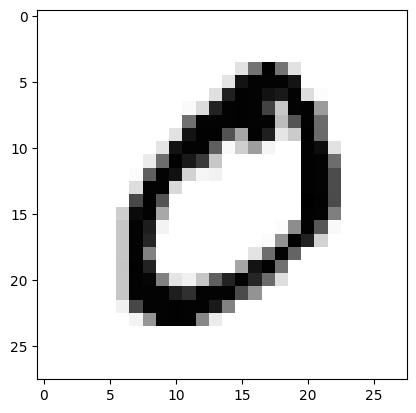

In [23]:
plt.imshow(X_train[1], cmap='Greys')
plt.show()

AttributeError: AxesImage.set() got an unexpected keyword argument 'cmp'

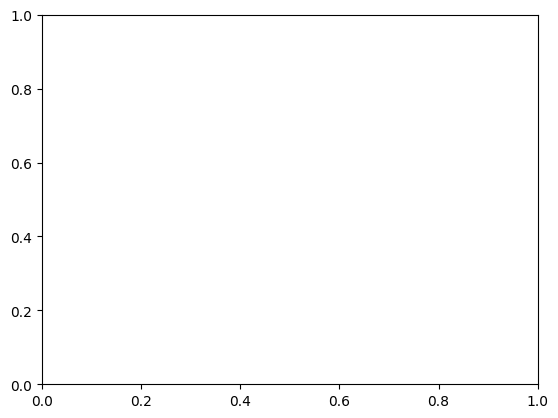

In [25]:
for i in np.arange(0,10):
    plt.imshow(X_train[i], cmp='Greys')
    plt.show()

In [26]:
def display_mult_images(images, titles, rows, cols):
  figure, ax = plt.subplots(rows,cols)  # array of axes

  for idx, img in enumerate(images):  # images is a list
    ax.ravel()[idx].imshow(img,
      cmap=plt.get_cmap('gray_r'))
    ax.ravel()[idx].set_title(titles[idx])
    # ax.ravel90[idx].set_axis_off()
  plt.tight_layout()
  plt.show()

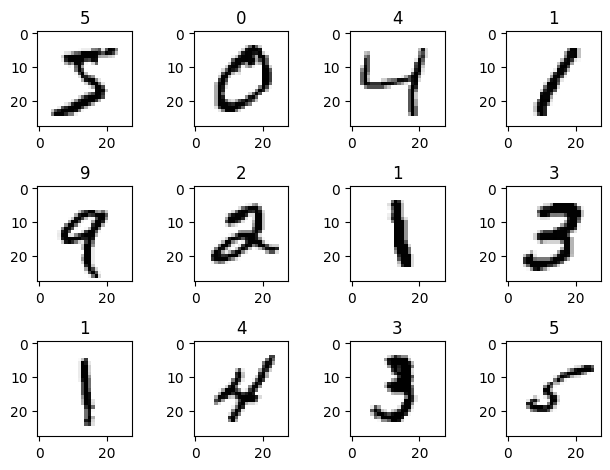

In [27]:
images, titles = X_train[:12], y_train[:12]
display_mult_images(images, titles, 3, 4)

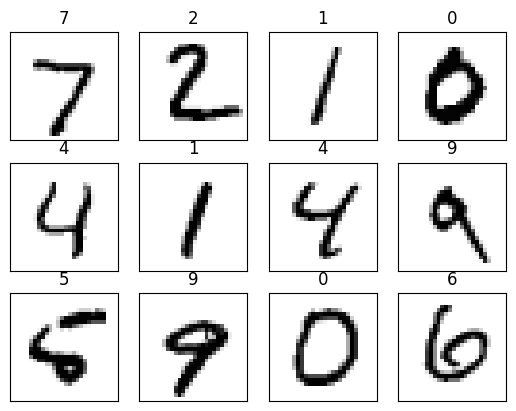

In [28]:
fig = plt.figure()  
for i in range(1, 13): 
    # 2x2 블록 영역의 i 위치(1부터 시작)
    subplot = fig.add_subplot(3, 4, i)
    # x,y축 지점 표시 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    # subplot 제목
    subplot.set_title('%i' % y_test[i-1])   # ('image %i' % i)
    # 입력으로 사용한 테스트 이미지를 28x28 구조로 재배열하고

    # 그레이스케일 이미지 출력
    subplot.imshow(X_test[i-1].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [29]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [39]:
X_train = X_train.astype('float64')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Features(X) 정규화
- 학습을 잘 되게 하기 위해서
- 0~1 값이 되도록 정규화함

In [42]:
# 각 요소 데이터범위 0~255 / 255 -> 0~1 값으로 정규화됨
X_train = X_train / 255.
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X_train.shape

(60000, 784)

In [44]:
X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
from tensorflow.keras.metrics import AUC

In [57]:
model = Sequential()
# 입력층
model.add(Input(shape=(784,)))
#은닉층
model.add(Dense(512, activation = 'relu'))
#출력층
model.add(Dense(10, activation = 'softmax'))

In [58]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 학습방법 정의

In [60]:
modelpath = './model/6-mnist_ann_best1.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

SyntaxError: invalid syntax (1358677480.py, line 1)

In [61]:
history = model.fit(X_train, y_train, 
                    validation_split=0.25, 
                    epochs=30, 
                    batch_size=200, 
                    verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8289 - loss: 0.6171 - val_accuracy: 0.9497 - val_loss: 0.1865
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9550 - loss: 0.1557 - val_accuracy: 0.9562 - val_loss: 0.1449
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9705 - loss: 0.1030 - val_accuracy: 0.9667 - val_loss: 0.1114
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9805 - loss: 0.0701 - val_accuracy: 0.9693 - val_loss: 0.1007
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.0540 - val_accuracy: 0.9728 - val_loss: 0.0954
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9874 - loss: 0.0437 - val_accuracy: 0.9749 - val_loss: 0.0856
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9925 - loss: 0.0289 - val_accuracy: 0.9749 - val_loss: 0.0866
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9940 - loss: 0.0246 - val_accuracy: 0.

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
modelpath = './model/6_mnist_dnn_best1.keras'
checkpointer = ModelCheckpoint(fillepath=modelpath, 
                monitor='val_loss',verbose=0,
                save_best_only=True
               )


# 모델 최적화를 위한 설정 구성

# 성능이 더이상 개선되지 않는 5지점에서 조기 종료됨
# partience=5
early_stopping_callback = EarlyStopping(moniter='val_loss',partience=10)

In [70]:
model.fit(X_train, y_train,
         validation_split=0.25,
         epochs=30,
         batch_size=200,
         verbose=1,
        callbacks=[early_stopping_callback, checkpointer])
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 2.0205e-04 - val_accuracy: 0.9803 - val_loss: 0.0996
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.8333e-04 - val_accuracy: 0.9799 - val_loss: 0.1009
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.7064e-04 - val_accuracy: 0.9799 - val_loss: 0.1016
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 1.5478e-04 - val_accuracy: 0.9794 - val_loss: 0.1026
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3625e-04 - val_accuracy: 0.9797 - val_loss: 0.1028
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.2264e-04 - val_accuracy: 0.9799 - val_loss: 0.1036
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.1991e-04 - val_accuracy: 0.9797 - val_loss: 0.1042
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - los

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
  • training=False
  • mask=None

## 학습 검증 데이터 
- 학습 데이터에 대한 loss와 검증 데이터

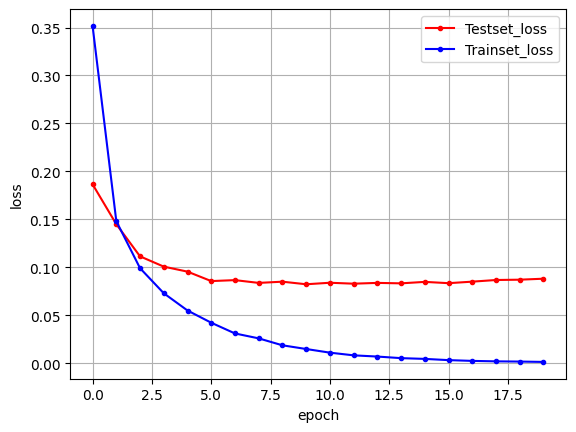

In [71]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_lostorys = his.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',bel='Trainset_loss')

# 그래프 그리기 c='blue', la

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [73]:
# 모델 삭제
del model

In [74]:
from tensorflow.keras.models import load_model

In [78]:
save_model = load_model('./model/6-mnist_ann_best1.keras')

## 모델 일반화
- 실재 데이터로 모델을 테스트함

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# image file의 경로 설정
img_path = './model/6-mnist_ann_best1.keras'
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

UnidentifiedImageError: cannot identify image file './model/6-mnist_ann_best1.keras'

In [81]:
image.shape

NameError: name 'image' is not defined

In [ ]:
브레인스토밍
프로젝트 기획 및 러프한 설계 로직 설계
데이터 수집